In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
from datetime import datetime
import scipy.optimize
import datashader as ds
import colorcet as cc
from sklearn.cluster import KMeans, MiniBatchKMeans
import holoviews as hv
from holoviews import opts
from holoviews.element.tiles import StamenTerrain
import holoviews.operation.datashader as hd
from IPython.display import Image

In [3]:
# import Data

df = pd.read_csv('demandserver.csv')

# Demand (rider)

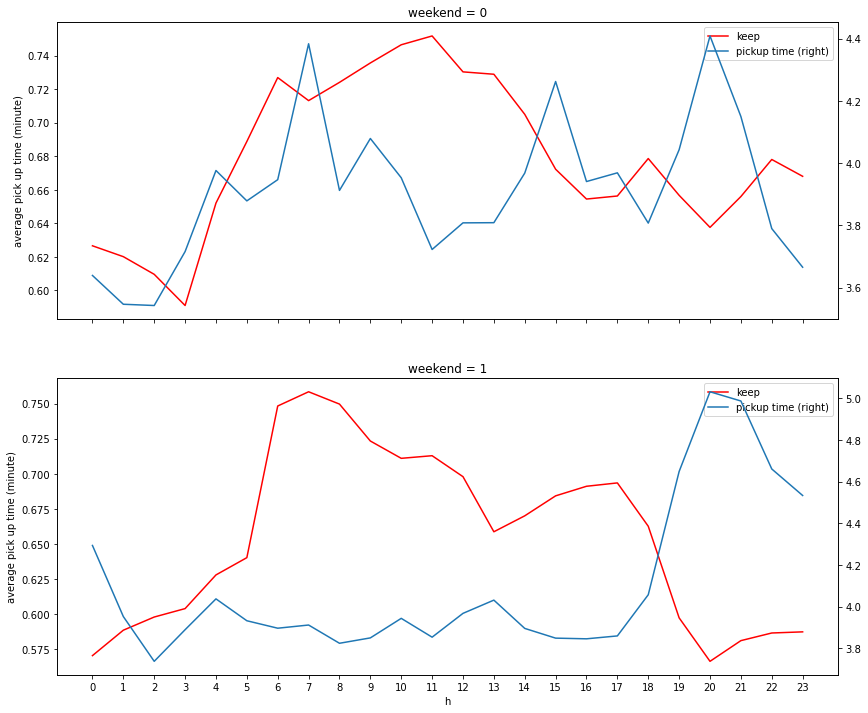

In [91]:
fig, axes = plt.subplots(2, sharex=True,figsize=(14,12))

for i in range(2):  
    df[df.weekend==i].groupby('h')['keep'].mean().plot(kind='line', legend=True,
                        ax=axes[i],c='r',  label='keep',xticks=np.arange(0,24,1))
    
    df[df.weekend==i].groupby('h')['driverETA'].mean().plot(kind='line',secondary_y=True,legend=True,
                        ax=axes[i],label='pickup time',xticks=np.arange(0,24,1),
                        ylabel="average pick up time (minute)")
    plt.title('weekend = {}'.format(i))
  
 



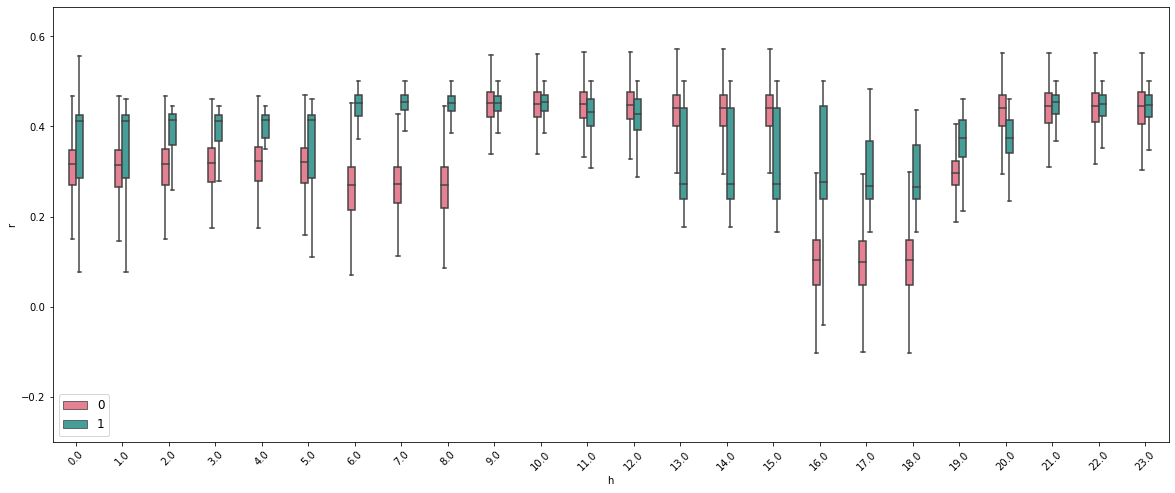

In [96]:

fig, ax = plt.subplots(figsize=(20,8))
plt.xticks(rotation = 45)
ax = sns.boxplot(x="h", y="r", hue="weekend",  color=".25",  data=df, palette="husl",fliersize=0, width=.3)
ax.set_ylim(-.3, None)
plt.legend(fontsize='large', loc='lower left')


In [112]:
def city(location, df=df)
    hv.extension('bokeh')
    colors = ["#FF0000","#FF3F00","#FF7F00","#FFBF00","#FFFF00","#BFFF00","#7FFF00","#3FFF00",
              "#00FF00","#00FF3F","#00FF7F","#00FFBF","#00FFFF","#00BFFF","#007FFF","#003FFF",
              "#0000FF","#3F00FF","#7F00FF","#BF00FF","#FF00FF","#FF00BF","#FF007F","#FF003F"]
    hours = np.arange(0,24,1)
    pickups = hv.Points(df, location)
    shade =  hd.datashade(pickups, aggregator=ds.count_cat('h'), color_key=colors)
    a = hd.dynspread(shade, threshold=0.3, max_px=4).opts(bgcolor='black', xaxis=None, yaxis=None, width=900, height=600)

    color_key = [(name,color) for name,color in zip(hours, colors)]
    color_points = hv.NdOverlay({n: hv.Points([0,0], label=str(n)).opts(color=c,size=0) for n,c in color_key},width=900, height=600)

    return(color_points *a)

Takeaway:
* Most of trips ends to downtown in the morning and genereated from downtown in the evening when people get back from work.
* There is three different level of congestion and most of the trips with high level of congestions starts from downtown.